In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('./dataset/raw_data.csv')
print(dataset.columns)
print(dataset.shape)
print(dataset.describe())

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
(24783, 7)
         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%    

In [5]:
# Keep only class and tweet columns
dataset = dataset[['class', 'tweet']].copy()
dataset.rename(columns={'class':'label'}, inplace=True)
print(dataset.columns)

# Drop rows with missing values and class as 2 which is neither hate speech nor offensive language
dataset.dropna(inplace=True)
dataset = dataset[dataset['label'] != 2]

hate = dataset[dataset['label'] == 0]
print("Hate speech: " + str(len(hate)))
offensive = dataset[dataset['label'] == 1]
print("Offensive language: "+ str(len(offensive)))

Index(['label', 'tweet'], dtype='object')
Hate speech: 1430
Offensive language: 19190


In [6]:
# Remove irrelevant information in tweets
import re

def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    return df

data_clean = clean_text(dataset, 'tweet')
data_clean.to_csv('./dataset/cleaned_dataset.csv', index=False)

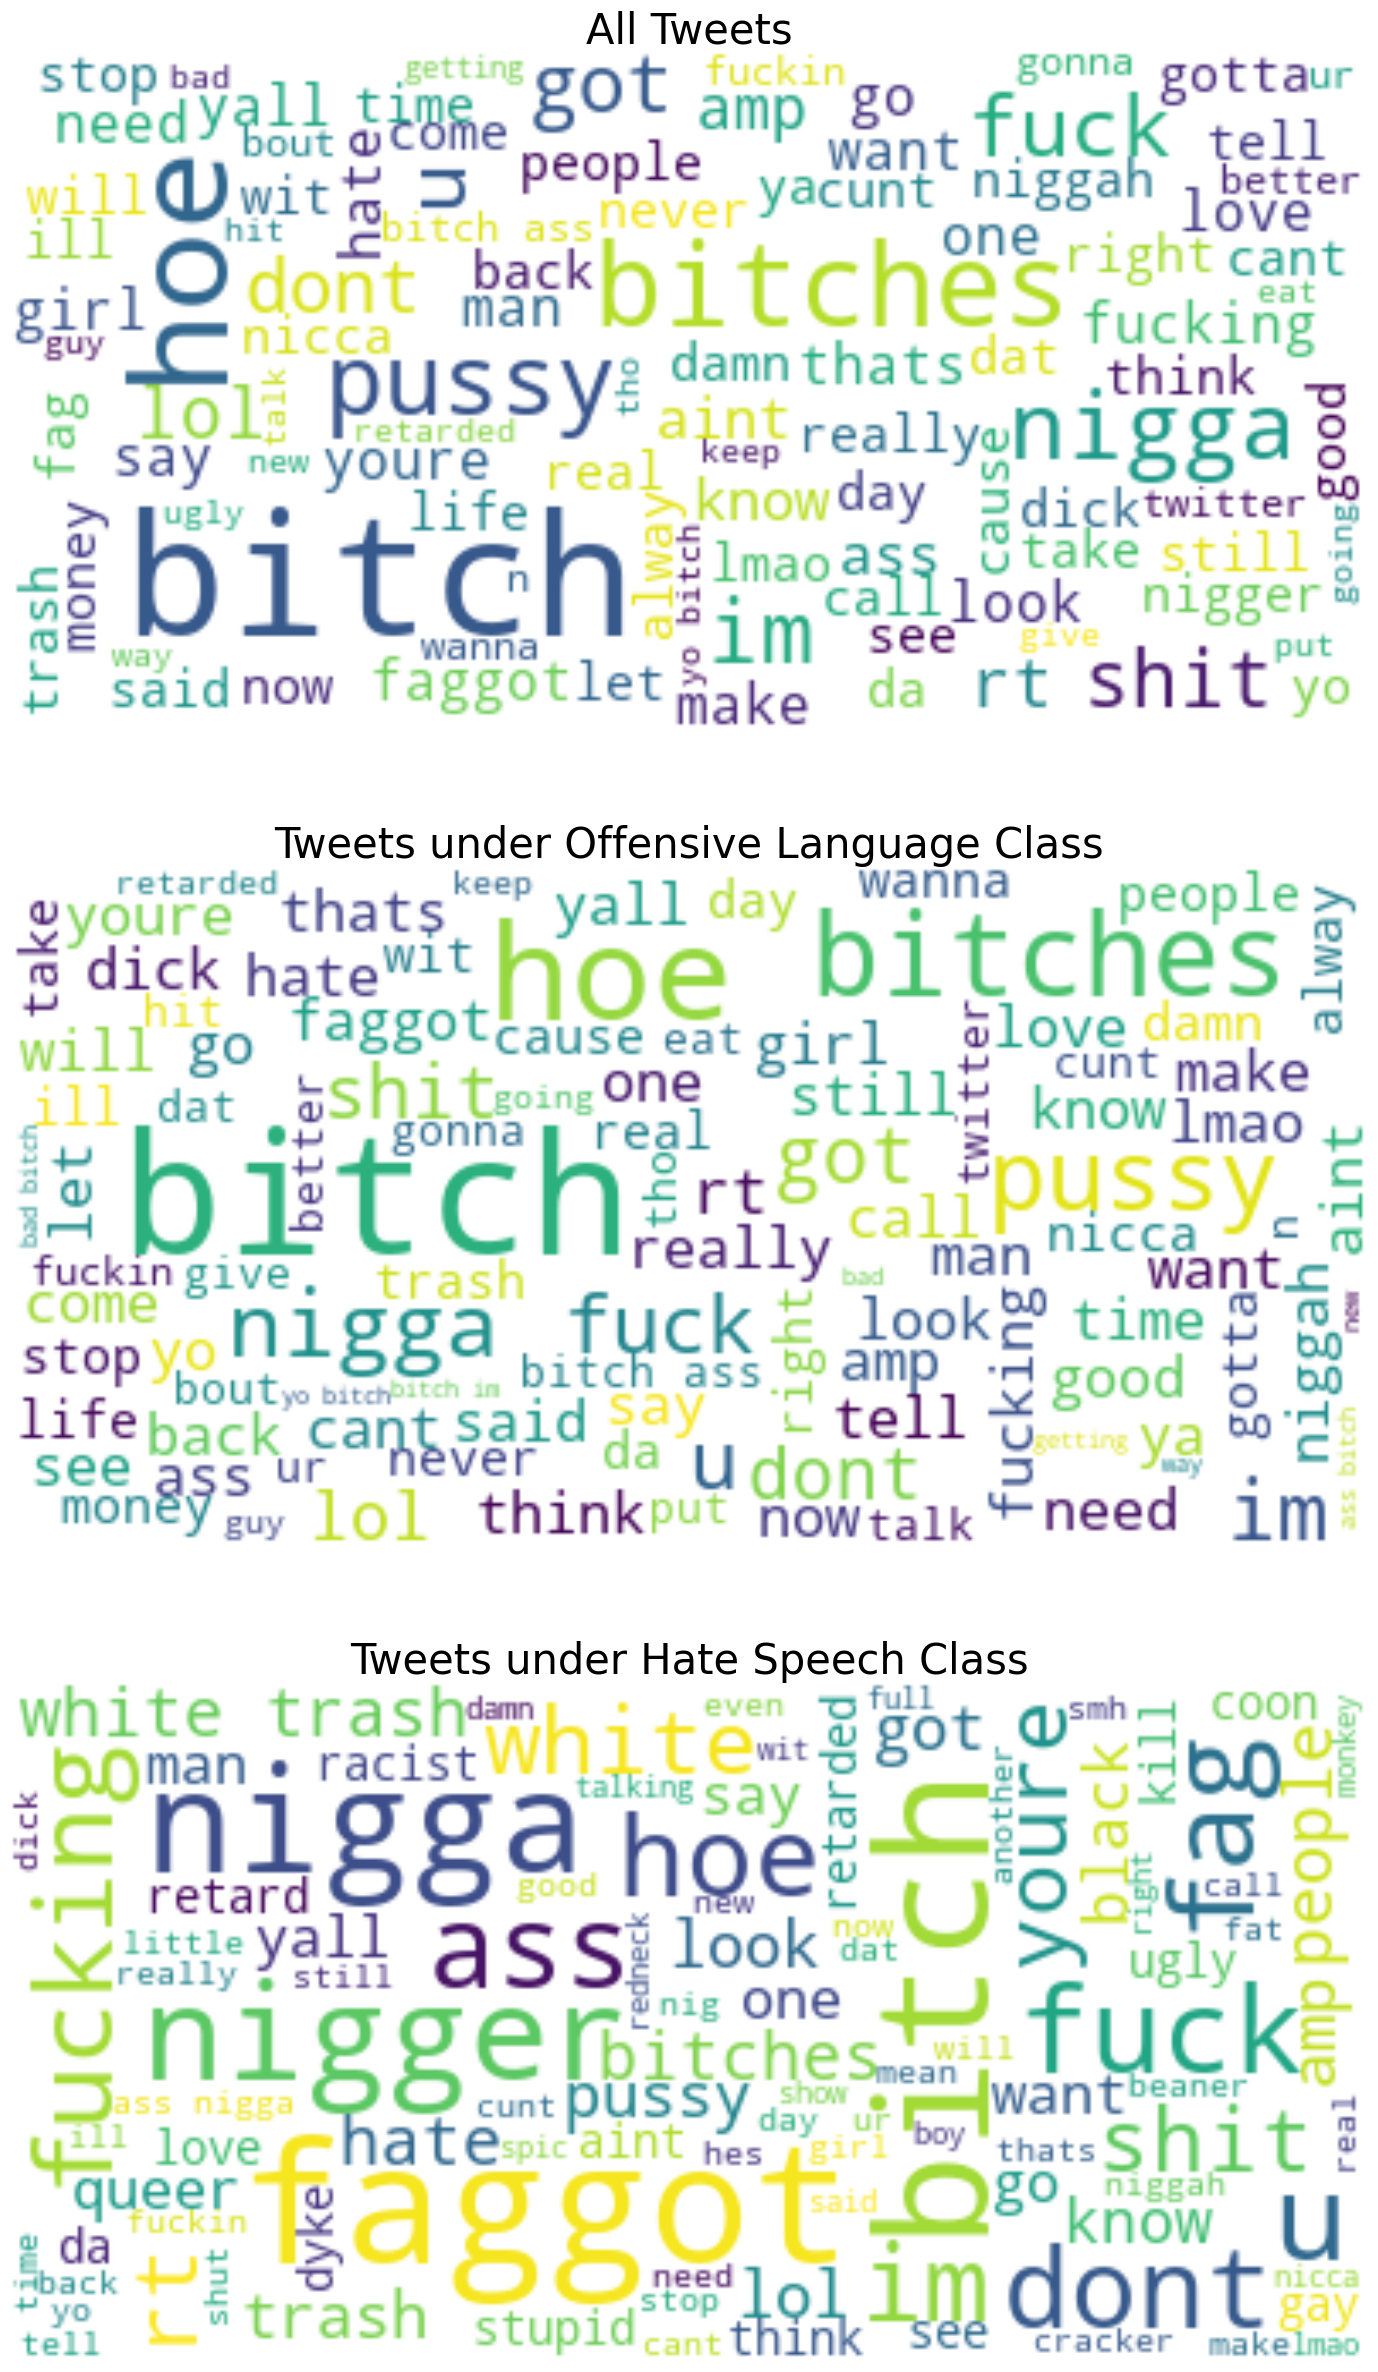

In [10]:
# Data visaualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os 

df_offensive = data_clean[data_clean['label'] == 1]
df_hate = data_clean[data_clean['label'] == 0]
tweet_all = " ".join(x for x in data_clean.tweet)
tweet_offensive = " ".join(x for x in df_offensive.tweet)
tweet_hate = " ".join(x for x in df_hate.tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_all)
wordcloud_offensive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_offensive)
wordcloud_hate = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hate)

# Display the images
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_offensive, interpolation='bilinear')
ax[1].set_title('Tweets under Offensive Language Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_hate, interpolation='bilinear')
ax[2].set_title('Tweets under Hate Speech Class',fontsize=30)
ax[2].axis('off')

if not os.path.exists("img"):
    os.makedirs("img")
wordcloud_all.to_file("img/wordcloud_all.png")
wordcloud_offensive.to_file("img/wordcloud_offensive.png")
wordcloud_hate.to_file("img/wordcloud_hate.png")


